In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc


In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
del train_df['id'],test_df['id']
_=gc.collect()
print(f'train:{train_df.shape}\ntest: {test_df.shape}')

train:(40000, 20)
test: (15000, 19)


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   XINGBIE     40000 non-null  int64  
 1   CSNY        40000 non-null  int64  
 2   HYZK        40000 non-null  int64  
 3   ZHIYE       40000 non-null  int64  
 4   ZHICHEN     40000 non-null  int64  
 5   ZHIWU       40000 non-null  int64  
 6   XUELI       40000 non-null  int64  
 7   DWJJLX      40000 non-null  int64  
 8   DWSSHY      40000 non-null  int64  
 9   GRJCJS      40000 non-null  float64
 10  GRZHZT      40000 non-null  int64  
 11  GRZHYE      40000 non-null  float64
 12  GRZHSNJZYE  40000 non-null  float64
 13  GRZHDNGJYE  40000 non-null  float64
 14  GRYJCE      40000 non-null  float64
 15  DWYJCE      40000 non-null  float64
 16  DKFFE       40000 non-null  int64  
 17  DKYE        40000 non-null  float64
 18  DKLL        40000 non-null  float64
 19  label       40000 non-nul

tips: 无object类型

In [3]:
#查看训练集测试集中特征属性只有一值的特征
train_one_value = [col for col in train_df.columns if train_df[col].nunique() <= 1]
test_one_value = [col for col in test_df.columns if test_df[col].nunique() <= 1]
print('one value featrues in train:',train_one_value)
print('one value featrues in test: ',test_one_value)

one value featrues in train: []
one value featrues in test:  ['HYZK', 'XUELI']


tips:'HYZK', 'XUELI' 测试集里只有一个类别

In [4]:
#缺失值
colnums=test_df.columns.values
train_null_list=[]
test_null_list=[]
for key in colnums:
    if(train_df[key].isnull().any()):
        train_null_list.append(key)
    if(test_df[key].isnull().any()):
        test_null_list.append(key)
print('train:',train_null_list)
print('test: ',test_null_list)

train: []
test:  []


tips: 无缺失值

In [5]:
#区分类别特征与连续特征
def split_features(df,colnums,nums=30):
    label_features={}
    continue_features={}
    for key in colnums:
        nunique=df[key].nunique()
        if np.issubdtype(df[key][0],np.int) and nunique<=nums:
            label_features.update({key:nunique})
        else:
            continue_features.update({key:nunique})
    print(label_features)
    #return label_features,continue_features

lable_nunique_maxnums=50
print('train:')
split_features(train_df,colnums=colnums,nums=lable_nunique_maxnums)
print('test :')
split_features(test_df,colnums=colnums,nums=lable_nunique_maxnums)

train:
{'XINGBIE': 3, 'HYZK': 4, 'ZHIYE': 7, 'ZHICHEN': 4, 'ZHIWU': 2, 'XUELI': 2, 'DWJJLX': 28, 'DWSSHY': 21, 'GRZHZT': 5}
test :
{'XINGBIE': 3, 'HYZK': 1, 'ZHIYE': 4, 'ZHICHEN': 2, 'ZHIWU': 2, 'XUELI': 1, 'DWJJLX': 27, 'DWSSHY': 21, 'GRZHZT': 5}


tips:HYZK ZHIYE ZHICHEN XUELI DWJJLX 测试集缺值

In [6]:
label_features=['XINGBIE', 'HYZK', 'ZHIYE', 'ZHICHEN', 'ZHIWU', 'XUELI', 'DWJJLX', 'DWSSHY', 'GRZHZT']
continue_featues=[fea for fea in colnums if fea not in label_features]
print('label features:   ',label_features,len(label_features))
print('continue features:',continue_featues,len(continue_featues))

label features:    ['XINGBIE', 'HYZK', 'ZHIYE', 'ZHICHEN', 'ZHIWU', 'XUELI', 'DWJJLX', 'DWSSHY', 'GRZHZT'] 9
continue features: ['CSNY', 'GRJCJS', 'GRZHYE', 'GRZHSNJZYE', 'GRZHDNGJYE', 'GRYJCE', 'DWYJCE', 'DKFFE', 'DKYE', 'DKLL'] 10


# 类别特征分析

In [13]:
#查看类别特征是否测试集类别有不在训练集的
test_outof_train=[]
for key in label_features:
    test_unique=test_df[key].unique().tolist()
    train_unique=train_df[key].unique().tolist()
    for index in test_unique:
        if index not in train_unique:
            test_outof_train.append(key)
            break
test_outof_train

[]

tips:类别特征 测试集样本空间均在训练集样本空间

XINGBIE 
    train  test
0      6     2
1  25512  9826
2  14482  5172
HYZK 
     train     test
0       6      NaN
10      5      NaN
20      1      NaN
90  39988  15000.0
ZHIYE 
     train     test
0       6      NaN
11      2      NaN
13     17      4.0
17     24      6.0
21      3      NaN
24      7      1.0
90  39941  14989.0
ZHICHEN 
      train     test
0        6      NaN
8       67     14.0
99       1      NaN
999  39926  14986.0
ZHIWU 
    train   test
0  39994  10000
1      6   5000
XUELI 
     train     test
0       6      NaN
99  39994  15000.0
DWJJLX 
      train    test
100     27    11.0
110  10095  4435.0
120    380    88.0
130    871   241.0
140     26     3.0
141    214    33.0
142     24     7.0
143     59    17.0
149      7     2.0
150  14891  5285.0
159    443   105.0
160   3051   908.0
170   1976   545.0
171     50    14.0
172     50    14.0
173    185    41.0
174      5     1.0
175     13     2.0
179      4     1.0
190    985   784.0
200    424   126.0
210     30

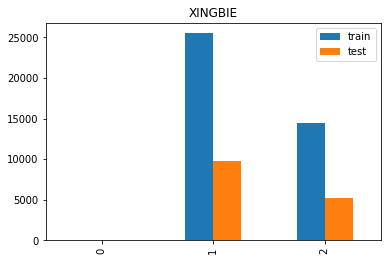

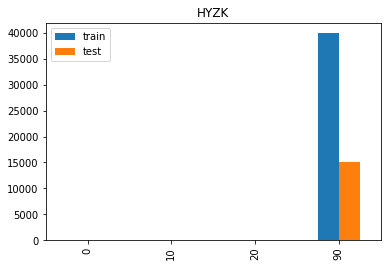

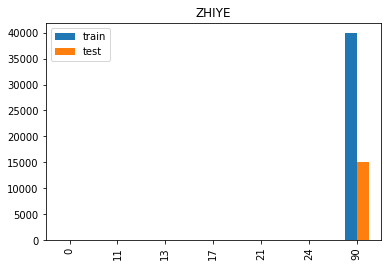

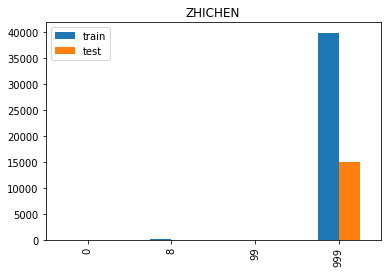

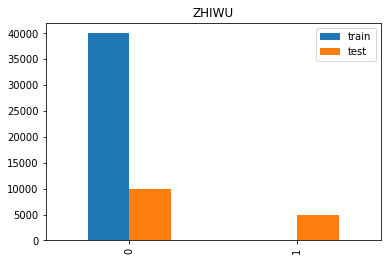

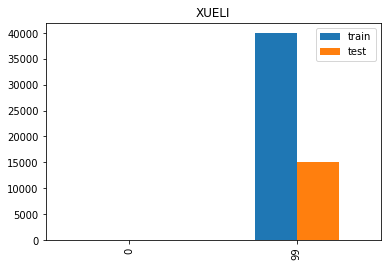

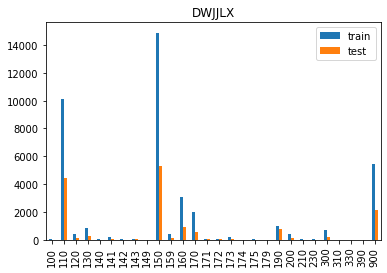

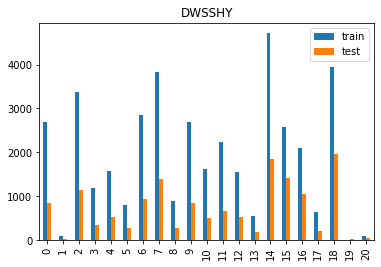

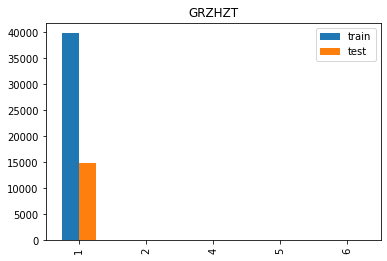

In [19]:
def show_label_features_distribution(df1,df2,Y=None):
    df1=df1.value_counts().sort_index()
    df2=df2.value_counts().sort_index()
    df=pd.concat([df1,df2],axis=1)
    feature_name=df.columns[0]
    df.columns=['train','test'] 
    df.plot.bar(title=feature_name)
    print(feature_name,'\n',df)

for key in label_features:q
    show_label_features_distribution(train_df[key],test_df[key])

ZHIYE 
     train     test
0       6      NaN
11      2      NaN
13     17      4.0
17     24      6.0
21      3      NaN
24      7      1.0
90  39941  14989.0


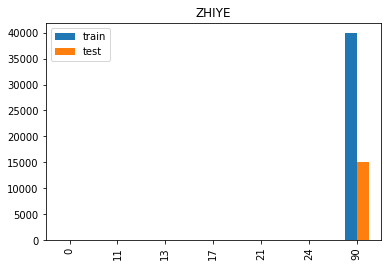

In [17]:
show_label_features_distribution(train_df['ZHIYE'],test_df['ZHIYE'])

ZHICHEN 
      train     test
0        6      NaN
8       67     14.0
99       1      NaN
999  39926  14986.0


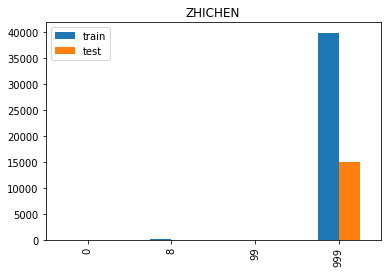

In [16]:
show_label_features_distribution(train_df['ZHICHEN'],test_df['ZHICHEN'])

XUELI 
     train     test
0       6      NaN
99  39994  15000.0


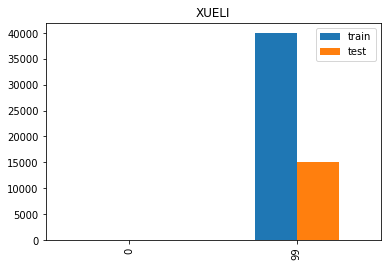

In [18]:
show_label_features_distribution(train_df['XUELI'],test_df['XUELI'])

DWJJLX 
      train    test
100     27    11.0
110  10095  4435.0
120    380    88.0
130    871   241.0
140     26     3.0
141    214    33.0
142     24     7.0
143     59    17.0
149      7     2.0
150  14891  5285.0
159    443   105.0
160   3051   908.0
170   1976   545.0
171     50    14.0
172     50    14.0
173    185    41.0
174      5     1.0
175     13     2.0
179      4     1.0
190    985   784.0
200    424   126.0
210     30     9.0
230     23     8.0
300    690   179.0
310      9     6.0
330     12     5.0
390      2     NaN
900   5454  2130.0


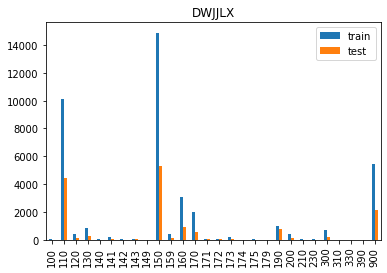

In [20]:
show_label_features_distribution(train_df['DWJJLX'],test_df['DWJJLX'])

<AxesSubplot:title={'center':'Pearson Correaltion of Feature'}>

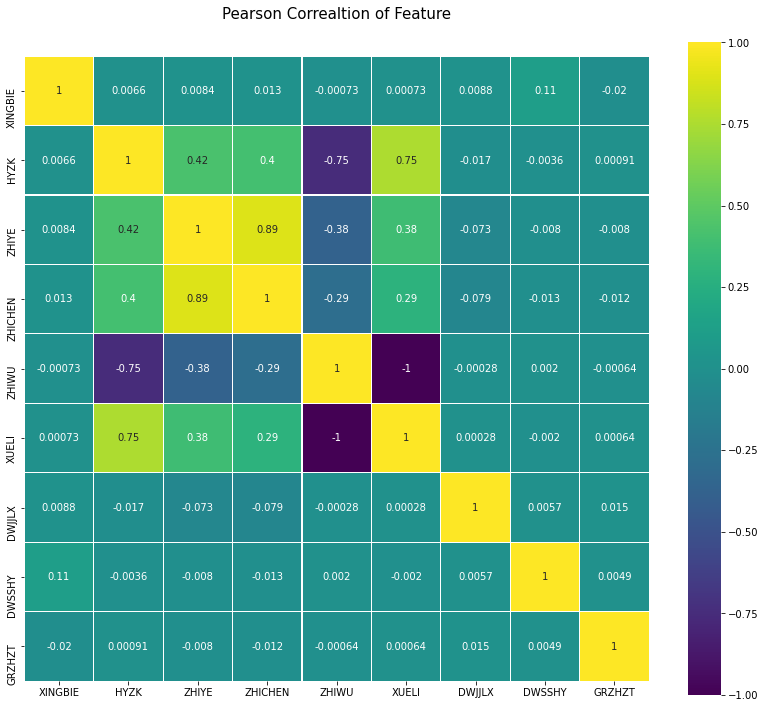

In [52]:
# 类别特征特征相关性
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correaltion of Feature',y=1.05,size=15)
sns.heatmap(train_df[label_features].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

tips:   
**学历和职务完全相关？**  
职业与职称 强相关。


# 连续值分析

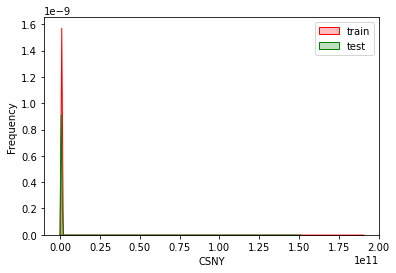

         train CSNY     test CSNY
count  4.000000e+04  1.500000e+04
mean   4.804910e+08  4.663650e+08
std    9.751818e+08  1.245969e+09
min    3.150720e+07  3.150720e+07
25%    3.391776e+08  3.102336e+08
50%    5.205276e+08  4.996224e+08
75%    6.338016e+08  6.258528e+08
max    1.903646e+11  1.504450e+11


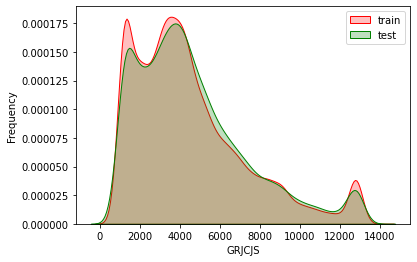

       train GRJCJS   test GRJCJS
count  40000.000000  15000.000000
mean    4507.734465   4613.322252
std     2844.622778   2814.608790
min      787.000000    787.000000
25%     2362.000000   2519.000000
50%     3887.500000   4042.956000
75%     5831.031250   5985.301500
max    13692.000000  13539.957000


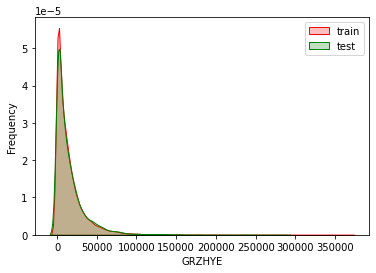

        train GRZHYE    test GRZHYE
count   40000.000000   15000.000000
mean    15020.190993   15577.533986
std     20189.939168   21241.662075
min       237.000000     237.000000
25%      1892.468750    1982.604000
50%      8545.727500    8490.962000
75%     19591.691250   20359.459000
max    366651.575000  284268.290000


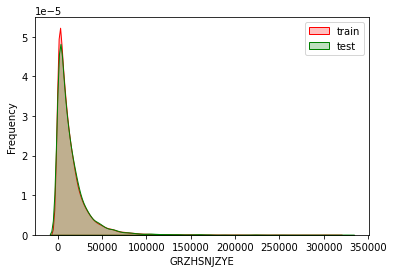

       train GRZHSNJZYE  test GRZHSNJZYE
count      40000.000000     15000.000000
mean       15316.570596     15644.271147
std        20061.193795     20456.270282
min          237.000000       237.000000
25%         2994.080000      3049.731500
50%         9010.740000      9239.072500
75%        19571.826250     20051.751250
max       313348.420000    325406.915000


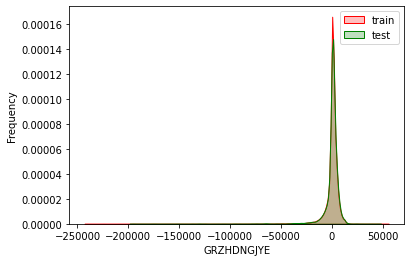

       train GRZHDNGJYE  test GRZHDNGJYE
count      40000.000000     15000.000000
mean        -117.379254      -153.783325
std         7968.738147      8438.062286
min      -240318.745000   -195191.480000
25%         -577.803750      -447.415000
50%          771.800000       772.137000
75%         2452.977500      2612.150250
max        53065.095000     44730.235000


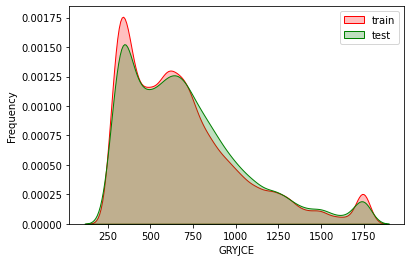

       train GRYJCE   test GRYJCE
count  40000.000000  15000.000000
mean     686.961022    704.336769
std      344.924156    342.200971
min      246.550000    265.643000
25%      411.000000    431.564000
50%      616.800000    642.148000
75%      849.060000    877.125000
max     1745.940000   1745.940000


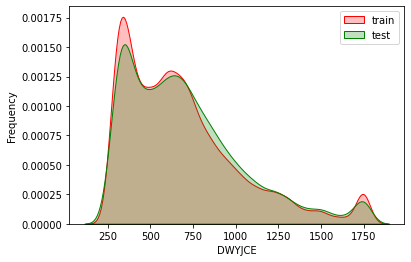

       train DWYJCE   test DWYJCE
count  40000.000000  15000.000000
mean     686.961022    704.336769
std      344.924156    342.200971
min      246.550000    265.643000
25%      411.000000    431.564000
50%      616.800000    642.148000
75%      849.060000    877.125000
max     1745.940000   1745.940000


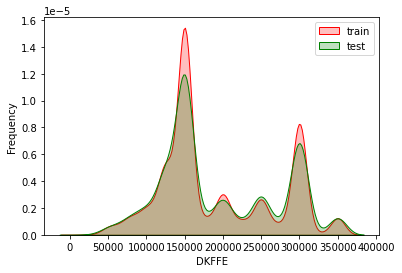

         train DKFFE     test DKFFE
count   40000.000000   15000.000000
mean   190324.265725  193009.411067
std     75334.858625   76903.407051
min     15237.000000   20237.000000
25%    150237.000000  150237.000000
50%    150237.000000  150237.000000
75%    250237.000000  261965.500000
max    350237.000000  350237.000000


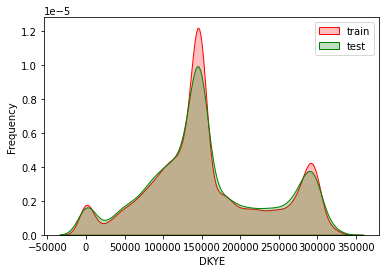

          train DKYE      test DKYE
count   40000.000000   15000.000000
mean   156308.760839  156060.991491
std     77409.960122   79102.546858
min       237.000000     237.000000
25%    110252.845000  107847.636250
50%    146210.880000  146210.880000
75%    200844.113750  206062.769500
max    329776.790000  325527.104000


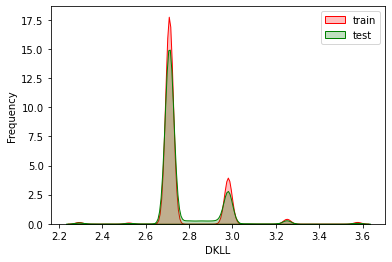

         train DKLL     test DKLL
count  40000.000000  15000.000000
mean       2.768083      2.765257
std        0.146709      0.136417
min        2.292000      2.292000
25%        2.708000      2.708000
50%        2.708000      2.708000
75%        2.708000      2.708000
max        3.575000      3.575000


In [49]:
def show_continue_features_distribution(df1,df2):
    feature_name=df1.name
    g = sns.kdeplot(df1.values, color="Red", shade = True)
    g = sns.kdeplot(df2.values, ax =g, color="Green", shade= True)
    g.set_xlabel(feature_name)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()
    describe=pd.concat([df1.describe(),df2.describe()],axis=1)
    describe.columns=[f'train {feature_name}',f'test {feature_name}']
    print(describe)

for key in continue_featues:
    show_continue_features_distribution(train_df[key],test_df[key])

tips:  
可疑分布:   
 ~~CSNY（出生年月）~~ GRZHYE（个人账户余额） GRZHSNJZYE（个人账户上年结转余额） GRZHDNGJYE（个人账户当年归集余额）  
但是不能确定是否由异常值造成，按字段名来看应该不是异常值。可考虑分箱。

<AxesSubplot:title={'center':'Pearson Correaltion of Feature'}>

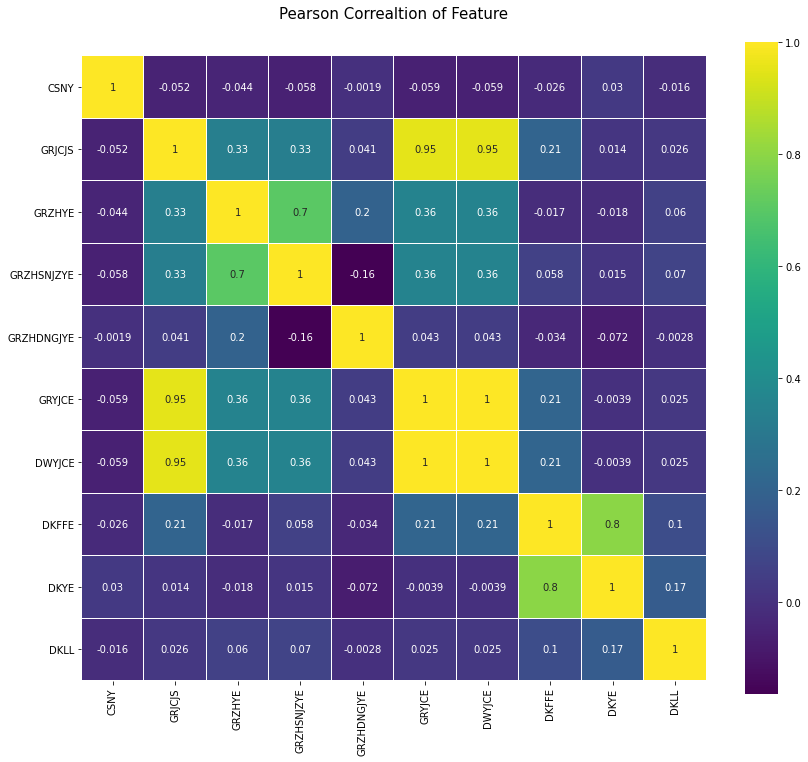

In [53]:
# 连续特征特征相关性
plt.figure(figsize=(14,12))
plt.title('Pearson Correaltion of Feature',y=1.05,size=15)
sns.heatmap(train_df[continue_featues].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

tips:  
GRJCJS（个人缴存基数），GRYJCE(个人月缴存余额)，DWYJCE（单位月缴存额）:三项强相关。  
DKFFE(贷款发放额)，DKYE(贷款余额)：较强相关。  
可降维，完全相关的可以直接删去。
